In [38]:
import scipy
import numpy as np
import matplotlib
import pandas
import sklearn
from matplotlib import pyplot
import matplotlib.pyplot as plt
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)
data2=dataset.drop(['sepal-length', 'sepal-width'], axis = 1)



In [39]:
pl_setosa_train = np.array(dataset.iloc[0:40, 2])
pl_versicolor_train = np.array(dataset.iloc[50:90, 2])
pl_virginica_train = np.array(dataset.iloc[100:140, 2])

pl_setosa_test = np.array(dataset.iloc[40:50, 2])
pl_versicolor_test = np.array(dataset.iloc[90:100, 2])
pl_virginica_test = np.array(dataset.iloc[140:150, 2])

pw_setosa_train = np.array(dataset.iloc[0:40, 3])
pw_versicolor_train = np.array(dataset.iloc[50:90, 3])
pw_virginica_train = np.array(dataset.iloc[100:140, 3])

pw_setosa_test = np.array(dataset.iloc[40:50, 3])
pw_versicolor_test = np.array(dataset.iloc[90:100, 3])
pw_virginica_test = np.array(dataset.iloc[140:150, 3])




In [40]:
mean_pl_setosa=np.mean(pl_setosa_train)
mean_pl_versicolor=np.mean(pl_versicolor_train)
mean_pl_virginica=np.mean(pl_virginica_train)

mean_pw_virginica=np.mean(pw_virginica_train)
mean_pw_versicolor=np.mean(pw_versicolor_train)
mean_pw_setosa=np.mean(pw_setosa_train)

mean_set=np.array([mean_pl_setosa,mean_pw_setosa])
print(mean_set)
mean_ver=np.array([mean_pl_versicolor,mean_pw_versicolor])
print(mean_ver)

mean_vir=np.array([mean_pl_virginica,mean_pw_virginica])
print(mean_vir)

cov_set=np.cov(dataset.iloc[0:40, 2],dataset.iloc[0:40, 3])

cov_ver=np.cov(dataset.iloc[50:90, 2],dataset.iloc[50:90, 3])
cov_vir=np.cov(dataset.iloc[100:140, 2],dataset.iloc[100:140, 3])

print(cov_set)
print(cov_ver)
print(cov_vir)


[ 1.4625  0.2325]
[ 4.3175  1.35  ]
[ 5.6075  1.99  ]
[[ 0.02958333  0.00458333]
 [ 0.00458333  0.00994231]]
[[ 0.20353205  0.07371795]
 [ 0.07371795  0.04307692]]
[[ 0.34532692  0.05930769]
 [ 0.05930769  0.07425641]]


In [41]:
confusion_matrix = np.zeros((3,3))
def Gaussian_2D (x,mu,cov):
    a = np.matrix(x-mu)
    #print(a)

    detcov=np.linalg.det(cov)
    #print(detcov)
    
    return 1/((2*np.pi)*np.sqrt(detcov))*np.exp(-0.5*a*np.linalg.inv(cov)*a.transpose())
#confusion = np.matrix()

for i in range(10):
    y1=[pl_setosa_test[i],pw_setosa_test[i]]
    #print (y1)
    q1=Gaussian_2D(y1,mean_set,cov_set)
    #print(q1)

    
    y2=[pl_versicolor_test[i],pw_versicolor_test[i]]
    q2=Gaussian_2D(y2,mean_set,cov_set)
    #print(q2)

    y3=[pl_virginica_test[i],pw_virginica_test[i]]
    q3=Gaussian_2D(y3,mean_set,cov_set)
    #print(q3)
    
    #if((y1>y2)&(y1>y3)):
     # confusion[0,0]=confusion[0,0]+1    
    
    probs = []
    probs.append(q1)
    probs.append(q2)
    probs.append(q3)
    max_prob = max(probs)
    if ((max_prob>q2)&(max_prob>q3)):
        confusion_matrix[0,0]=confusion_matrix[0,0]+1
print(confusion_matrix)


    

[[ 10.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]]


In [42]:
for i in range(10):
    y1=[pl_setosa_test[i],pw_setosa_test[i]]
    #print (y1)
    r1=Gaussian_2D(y1,mean_ver,cov_ver)


    
    r2=[pl_versicolor_test[i],pw_versicolor_test[i]]
    r2=Gaussian_2D(y2,mean_ver,cov_ver)


    r3=[pl_virginica_test[i],pw_virginica_test[i]]
    r3=Gaussian_2D(y3,mean_ver,cov_ver)

    
    #if((y1>y2)&(y1>y3)):
     # confusion[0,0]=confusion[0,0]+1    
    
    probs = []
    probs.append(r1)
    probs.append(r2)
    probs.append(r3)
    max_prob = max(probs)
    if ((max_prob>r1)&(max_prob>r3)):
        confusion_matrix[1,1]=confusion_matrix[1,1]+1
print(confusion_matrix)
        


[[ 10.   0.   0.]
 [  0.  10.   0.]
 [  0.   0.   0.]]


In [43]:
for i in range(10):
    y1=[pl_setosa_test[i],pw_setosa_test[i]]
    #print (y1)
    s1=Gaussian_2D(y1,mean_vir,cov_vir)
    

    
    y2=[pl_versicolor_test[i],pw_versicolor_test[i]]
    s2=Gaussian_2D(y2,mean_vir,cov_vir)


    y3=[pl_virginica_test[i],pw_virginica_test[i]]
    s3=Gaussian_2D(y3,mean_vir,cov_vir)
    
    #if((y1>y2)&(y1>y3)):
     # confusion[0,0]=confusion[0,0]+1    
    
    probs = []
    probs.append(s1)
    probs.append(s2)
    probs.append(s3)
    max_prob = max(probs)
    if ((max_prob>s1)&(max_prob>s2)):
        confusion_matrix[2,2]=confusion_matrix[2,2]+1
print(confusion_matrix)


[[ 10.   0.   0.]
 [  0.  10.   0.]
 [  0.   0.  10.]]


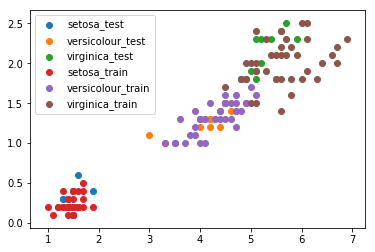

In [44]:
plt.scatter(pl_setosa_test,pw_setosa_test,label='setosa_test')
plt.scatter(pl_versicolor_test,pw_versicolor_test,label='versicolour_test')
plt.scatter(pl_virginica_test,pw_virginica_test,label='virginica_test')
plt.scatter(pl_setosa_train,pw_setosa_train,label='setosa_train')
plt.scatter(pl_versicolor_train,pw_versicolor_train,label='versicolour_train')
plt.scatter(pl_virginica_train,pw_virginica_train,label='virginica_train')
plt.legend()
plt.show()
#plt.show()



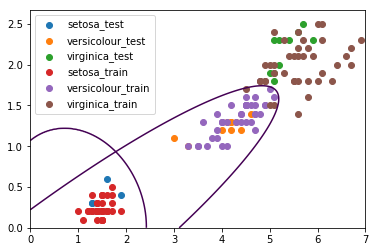

In [45]:
def setosa_versi(x):
    a1=(Gaussian_2D(x,mean_set,cov_set))
  
    a2=(Gaussian_2D(x,mean_ver,cov_ver))
   
    return ((a1)-(a2))

def setosa_virgi(x):
    a1=(Gaussian_2D(x,mean_ver,cov_ver))
    a2=(Gaussian_2D(x,mean_vir,cov_vir))
   
    return ((a1)-(a2))

yp = np.arange(0, 2.5, 0.01)
xp = np.arange(0, 7.0, 0.01)
yp1 = np.arange(0, 2.5,1)
xp1 = np.arange(0, 7.0,1)
Z1 = np.empty([250,700])
Z2 = np.empty([250,700])

for i in np.arange(250):
    for j in np.arange(700):
        Z1[i,j]=setosa_versi([xp[j],yp[i]])
        
for i in np.arange(250):
    for j in np.arange(700):
        Z2[i,j]=setosa_virgi([xp[j],yp[i]])
        
#plt.imshow(Z1)
plt.scatter(pl_setosa_test,pw_setosa_test,label='setosa_test')
plt.scatter(pl_versicolor_test,pw_versicolor_test,label='versicolour_test')
plt.scatter(pl_virginica_test,pw_virginica_test,label='virginica_test')
plt.scatter(pl_setosa_train,pw_setosa_train,label='setosa_train')
plt.scatter(pl_versicolor_train,pw_versicolor_train,label='versicolour_train')
plt.scatter(pl_virginica_train,pw_virginica_train,label='virginica_train')

plt.legend()            
plt.contour(xp,yp,Z1,levels=[0])
plt.contour(xp,yp,Z2,levels=[0])

plt.show()

# max_index = probs.index(max_prob)
    
#np.random.multivariate_normal(mean_set,cov_set)

In [52]:
from sklearn.model_selection import train_test_split
setosa_data = (data2.iloc[0:50])
setosa_train, setosa_test = train_test_split(setosa_data, test_size = 0.2) 
pl_set_train=np.array(setosa_train.iloc[:,0])
pw_set_train=np.array(setosa_train.iloc[:,1])
pl_set_test=np.array(setosa_test.iloc[:,0])
pw_set_test=np.array(setosa_test.iloc[:,1])

versi_data=data2.iloc[50:100]
versi_train, versi_test = train_test_split(versi_data, test_size = 0.2) 
pl_versi_train=np.array(versi_train.iloc[:,0])
pw_versi_train=np.array(versi_train.iloc[:,1])
pl_versi_test=np.array(versi_test.iloc[:,0])
pw_versi_test=np.array(versi_test.iloc[:,1])


virgi_data=data2.iloc[100:150]
virgi_train, virgi_test = train_test_split(virgi_data, test_size = 0.2) 
pl_virgi_train=np.array(virgi_train.iloc[:,0])
pw_virgi_train=np.array(virgi_train.iloc[:,1])
pl_virgi_test=np.array(virgi_test.iloc[:,0])
pw_virgi_test=np.array(virgi_test.iloc[:,1])


In [53]:
mean_pl_set=np.mean(pl_set_train)
mean_pl_versi=np.mean(pl_versi_train)
mean_pl_virgi=np.mean(pl_virgi_train)

mean_pw_virgi=np.mean(pw_virgi_train)
mean_pw_versi=np.mean(pw_versi_train)
mean_pw_set=np.mean(pw_set_train)

mean_set=np.array([mean_pl_set,mean_pw_set])
print(mean_set)
mean_ver=np.array([mean_pl_versi,mean_pw_versi])
print(mean_ver)

mean_vir=np.array([mean_pl_virgi,mean_pw_virgi])
print(mean_vir)

cov_set=np.cov(pl_set_train,pw_set_train)

cov_ver=np.cov(pl_versi_train,pw_versi_train)
cov_vir=np.cov(pl_virgi_train,pw_virgi_train)

print(cov_set)
print(cov_ver)
print(cov_vir)


[ 1.475  0.25 ]
[ 4.27    1.3375]
[ 5.575   2.0325]
[[ 0.03423077  0.00615385]
 [ 0.00615385  0.01282051]]
[[ 0.25292308  0.07628205]
 [ 0.07628205  0.03830128]]
[[ 0.29371795  0.04621795]
 [ 0.04621795  0.07712179]]


In [55]:
confusion_matrix = np.zeros((3,3))
def Gaussian_2D (x,mu,cov):
    a = np.matrix(x-mu)
    #print(a)

    detcov=np.linalg.det(cov)
    #print(detcov)
    
    return 1/((2*np.pi)*np.sqrt(detcov))*np.exp(-0.5*a*np.linalg.inv(cov)*a.transpose())
#confusion = np.matrix()

for i in range(10):
    y1=[pl_setosa_test[i],pw_setosa_test[i]]
    #print (y1)
    q1=Gaussian_2D(y1,mean_set,cov_set)
    #print(q1)

    
    y2=[pl_versi_test[i],pw_versi_test[i]]
    q2=Gaussian_2D(y2,mean_set,cov_set)
    #print(q2)

    y3=[pl_virgi_test[i],pw_virgi_test[i]]
    q3=Gaussian_2D(y3,mean_set,cov_set)
    #print(q3)
    
    #if((y1>y2)&(y1>y3)):
     # confusion[0,0]=confusion[0,0]+1    
    
    probs = []
    probs.append(q1)
    probs.append(q2)
    probs.append(q3)
    max_prob = max(probs)
    if ((max_prob>q2)&(max_prob>q3)):
        confusion_matrix[0,0]=confusion_matrix[0,0]+1
        
for i in range(10):
    y1=[pl_setosa_test[i],pw_setosa_test[i]]
    #print (y1)
    r1=Gaussian_2D(y1,mean_ver,cov_ver)

    
    r2=[pl_versi_test[i],pw_versi_test[i]]
    r2=Gaussian_2D(y2,mean_ver,cov_ver)
    

    r3=[pl_virgi_test[i],pw_virgi_test[i]]
    r3=Gaussian_2D(y3,mean_ver,cov_ver)

    
    #if((y1>y2)&(y1>y3)):
     # confusion[0,0]=confusion[0,0]+1    
    
    probs = []
    probs.append(r1)
    probs.append(r2)
    probs.append(r3)
    max_prob = max(probs)
    if ((max_prob>r1)&(max_prob>r3)):
        confusion_matrix[1,1]=confusion_matrix[1,1]+1

        

for i in range(10):
    y1=[pl_set_test[i],pw_set_test[i]]
    #print (y1)
    s1=Gaussian_2D(y1,mean_vir,cov_vir)
    

    
    y2=[pl_versi_test[i],pw_versi_test[i]]
    s2=Gaussian_2D(y2,mean_vir,cov_vir)


    y3=[pl_virgi_test[i],pw_virgi_test[i]]
    s3=Gaussian_2D(y3,mean_vir,cov_vir)

    
    #if((y1>y2)&(y1>y3)):
     # confusion[0,0]=confusion[0,0]+1    
    
    probs = []
    probs.append(s1)
    probs.append(s2)
    probs.append(s3)
    max_prob = max(probs)
    if ((max_prob>s1)&(max_prob>s2)):
        confusion_matrix[2,2]=confusion_matrix[2,2]+1
print(confusion_matrix)

[[ 10.   0.   0.]
 [  0.  10.   0.]
 [  0.   0.  10.]]
